In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings as ws
import seaborn as sns
import matplotlib.pyplot as plt
ws.filterwarnings("ignore")

In [4]:
df = pd.read_csv("../Chapter03/weather.csv")

In [5]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [6]:
df.isna().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

In [7]:
df.describe()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.857208,0.735272,10.813565,185.979700,10.372964,1004.896421,0.891200
std,9.512244,0.195498,6.972569,107.469909,4.178680,109.617120,0.311404
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.655556,0.600000,5.747700,112.000000,8.287475,1011.890000,1.000000
50%,11.561111,0.780000,9.933700,179.000000,10.046400,1016.500000,1.000000
75%,18.822222,0.900000,14.103600,290.000000,14.876400,1021.110000,1.000000
max,38.838889,1.000000,53.242700,359.000000,16.100000,1045.380000,1.000000


In [8]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


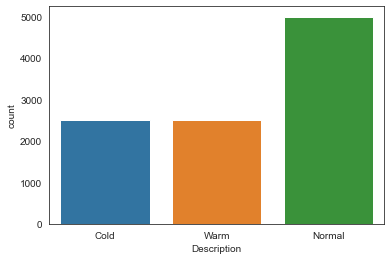

In [10]:
sns.set_style("white")
sns.countplot(df.Description)

In [11]:
def clean_name(name):
    return name.strip().lower().replace(" ", "_")

In [12]:
df.rename(columns=clean_name, inplace=True)

In [13]:
df.head()

,temperature_c,humidity,wind_speed_kmh,wind_bearing_degrees,visibility_km,pressure_millibars,rain,description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [14]:
numeric_df = df.drop(columns=["rain", "description"])

In [16]:
finalized_df = pd.get_dummies(df, drop_first=True)

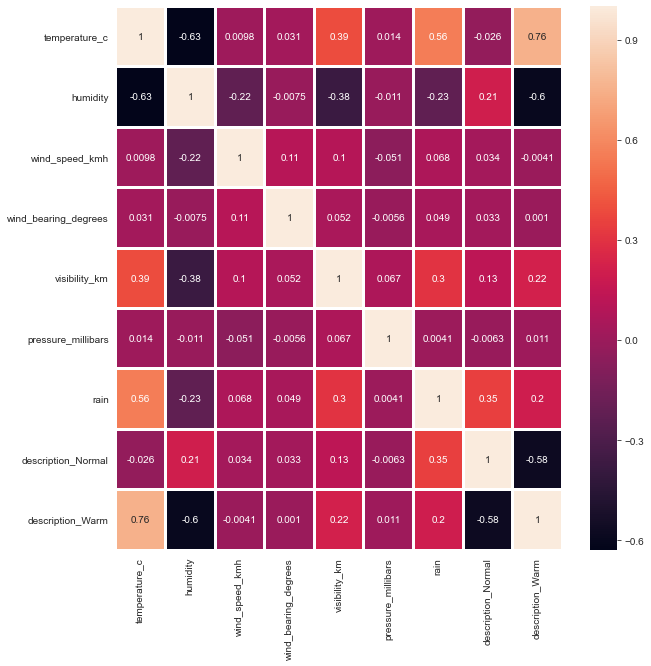

In [18]:
# Find correlation
plt.figure(figsize=(10,10))
sns.heatmap(finalized_df.corr(), annot=True, linewidths=2)
plt.show()

In [63]:
abs(finalized_df.corr()["temperature_c"]).sort_values(ascending=False)[1:]

description_Warm        0.755635
humidity                0.628855
rain                    0.557795
visibility_km           0.389466
wind_bearing_degrees    0.031397
description_Normal      0.026012
pressure_millibars      0.013739
wind_speed_kmh          0.009768
Name: temperature_c, dtype: float64

In [67]:
features_extracted = finalized_df[["humidity", "rain", "visibility_km", "description_Warm"]]

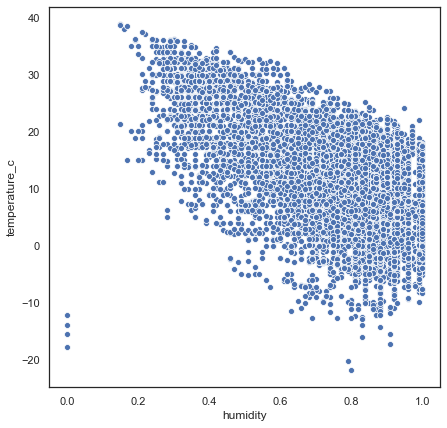

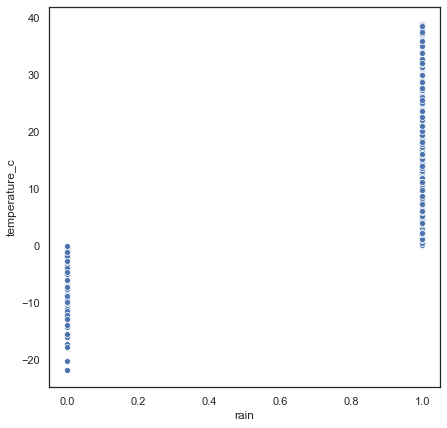

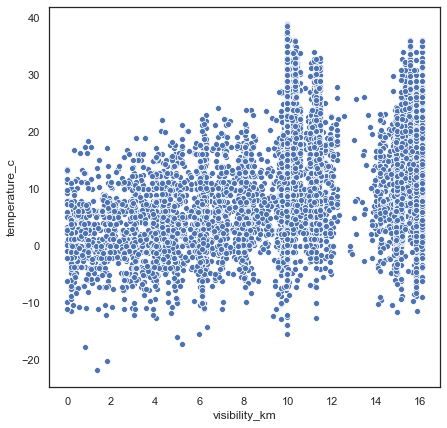

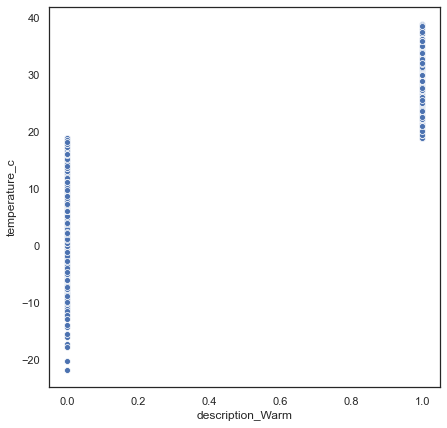

In [69]:
for i in features_extracted.columns.tolist():
    sns.set_style("white")
    plt.figure(figsize=(7,7))
    sns.scatterplot(x=i, y ="temperature_c", data = finalized_df, markers="X")
    plt.show()

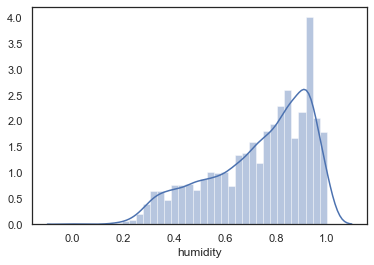

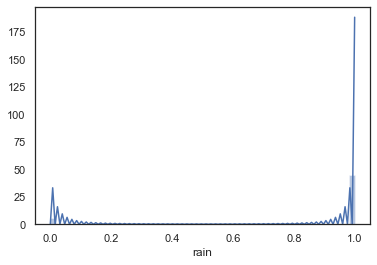

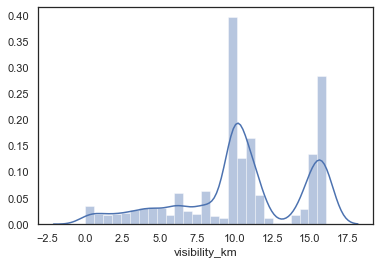

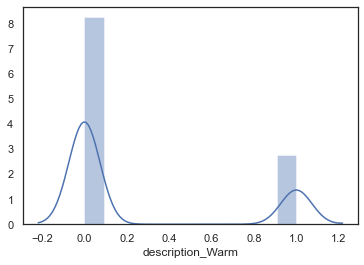

In [71]:
# Checking the distribution of the selected features
for i in features_extracted.columns.tolist():
    sns.set_style("white")
    sns.distplot(finalized_df[i])
    plt.show()

In [73]:
# We are fitting the model with these params only
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
X = features_extracted
y = df["temperature_c"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [75]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_pred = linear.predict(X_test)

In [77]:
# Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [78]:
print(r2_score(y_test, y_pred))

0.7686538678736984


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
linear1 = LinearRegression(normalize=True)
linear1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [81]:
y_pred_new = linear1.predict(X_test)

In [82]:
print(r2_score(y_test, y_pred_new))

0.7686538678736984


In [83]:
linear1.coef_

array([-1.74181365,  3.60343647,  0.80437663,  5.28828114])

In [89]:
# Trying the  more complex model 
from sklearn.linear_model import ElasticNet
elas = ElasticNet()
elas.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
y_pred_elas = elas.predict(X_test)

In [91]:
print(r2_score(y_test, y_pred_elas))

0.702022352273727


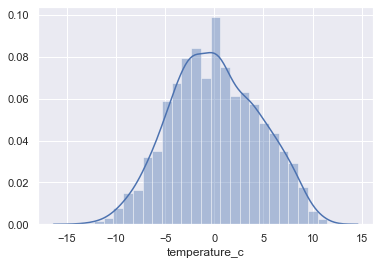

In [93]:
sns.set()
sns.distplot((y_test - y_pred))
plt.show()
# As we can see the error is normally distributed it is quite a good model 

In [95]:
from sklearn.ensemble import RandomForestRegressor
rfe = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6)
rfe.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [96]:
y_ped_tree = rfe.predict(X_test)

In [101]:
print("R2 score is ", round(r2_score(y_test, y_ped_tree) * 100, 2))

R2 score is  79.13


In [103]:
print("MSE score is ", round(mean_squared_error(y_test, y_ped_tree) * 100, 2))

MSE score is  1813.96


In [104]:
print("RMSE score is ", round(np.sqrt(mean_squared_error(y_test, y_ped_tree)) * 100, 2))

RMSE score is  425.91


In [112]:
# Tuning the Random Forest
from sklearn.model_selection import GridSearchCV
random_forest1 = RandomForestRegressor()
grid = {'n_estimators' : [50, 100, 200],
        'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 10),

        'min_impurity_decrease': np.linspace(0.0, 1.0, 10),
       }


gsv = GridSearchCV(random_forest1, grid, cv=5)

gsv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=Non...
             param_grid={'min_impurity_decrease': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.888888

In [115]:
tp = gsv.best_params_
from pprint import pprint
pprint(tp)

{'min_impurity_decrease': 0.1111111111111111,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200}


In [116]:
random_forest2 = RandomForestRegressor(n_estimators=tp['n_estimators'], min_impurity_decrease=tp['min_impurity_decrease'], min_weight_fraction_leaf=tp['min_weight_fraction_leaf'], random_state=42)

In [117]:
random_forest2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.1111111111111111,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [118]:
y_pred_rfe2 = random_forest2.predict(X_test)

In [119]:
print("R2 score is ", round(r2_score(y_test, y_pred_rfe2) * 100, 2))
print("MSE score is ", round(mean_squared_error(y_test, y_pred_rfe2) * 100, 2))
print("RMSE score is ", round(np.sqrt(mean_squared_error(y_test, y_pred_rfe2)) * 100, 2))

R2 score is  78.75
MSE score is  1846.86
RMSE score is  429.75


In [120]:
y_pred_rfe2.shape

(2000,)

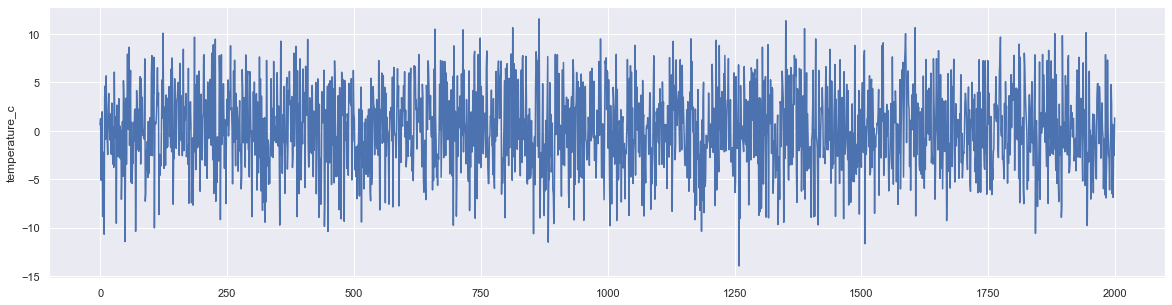

In [125]:
plt.figure(figsize=(20,5))
temp = [i for i in range(2000)]
sns.lineplot(x=temp, y=y_test - y_pred_rfe2)
plt.show()